In [2]:
from fastai.vision.all import *

In [2]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [3]:
path = untar_data(URLs.PETS) / 'images'

In [4]:
path

Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images')

In [9]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)


In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.134478,0.017903,0.006766,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.045085,0.007895,0.004060,00:25


In [3]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

In [4]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.834540,2.193442,00:01


epoch,train_loss,valid_loss,time
0,1.646201,1.464725,00:01
1,1.460548,1.267148,00:01
2,1.385383,1.216292,00:01
3,1.285198,1.056545,00:01
4,1.179739,0.884915,00:01
5,1.078285,0.842883,00:01
6,0.988915,0.806559,00:01
7,0.915285,0.788790,00:01


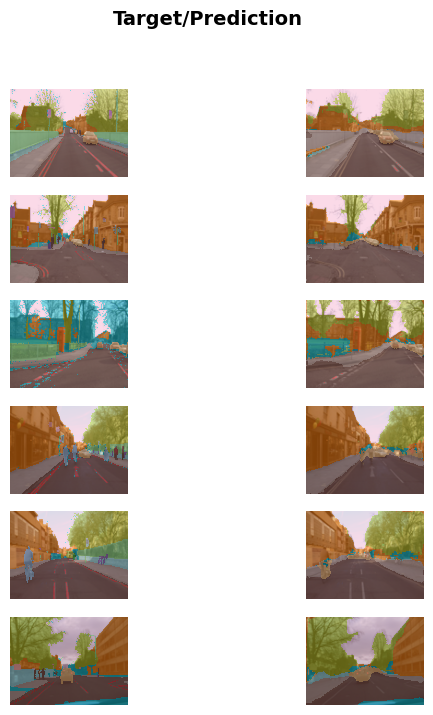

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

In [1]:
from fastai.text.all import *

In [2]:
dls = TextDataLoaders.from_folder(
    untar_data(URLs.IMDB),
    valid='test'
)

In [3]:
learn = text_classifier_learner(
    dls,
    AWD_LSTM,
    drop_mult=0.5,
    metrics=accuracy
)
learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461506,0.399983,0.817760,00:59


epoch,train_loss,valid_loss,accuracy,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 148.00 MiB. GPU 0 has a total capacity of 7.53 GiB of which 19.56 MiB is free. Including non-PyTorch memory, this process has 7.49 GiB memory in use. Of the allocated memory 7.17 GiB is allocated by PyTorch, and 151.59 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [4]:
review_sample = """*The Godfather* is a masterful film that blends family drama, crime, and tragedy into an unforgettable story. The performances, especially Marlon Brando and Al Pacino, are astonishingly good, and the slow transformation of Michael Corleone is both chilling and captivating. Every scene feels carefully crafted, with beautiful cinematography, a haunting score, and dialogue that sticks with you long after it's over. It's the kind of movie that completely pulls you in and still feels powerful and relevant today."""

In [5]:
learn.predict(review_sample)

OutOfMemoryError: CUDA out of memory. Tried to allocate 52.00 MiB. GPU 0 has a total capacity of 7.53 GiB of which 19.56 MiB is free. Including non-PyTorch memory, this process has 7.49 GiB memory in use. Of the allocated memory 7.17 GiB is allocated by PyTorch, and 147.37 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [8]:
doc(learn.predict)

Learner.predict(item, rm_type_tfms=None, with_input=False)
Prediction on `item`, fully decoded, loss function decoded and probabilities

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [2]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)


In [3]:
dls = TabularDataLoaders.from_csv(
    path/'adult.csv',
    path=path,
    y_names="salary",
    cat_names=[
        'workclass',
        'education',
        'marital-status',
        'occupation',
        'relationship',
        'race'    
    ],
    cont_names=['age', 'fnlwgt', 'education-num'],
    procs=[Categorify, FillMissing, Normalize]
)

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [4]:
learn = tabular_learner(dls, metrics=accuracy)

In [5]:

learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.369284,0.366677,0.831235,00:02
1,0.356273,0.350880,0.838913,00:01
2,0.350613,0.348615,0.838145,00:01


In [6]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [7]:
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.507738,1.396726,00:00


epoch,train_loss,valid_loss,time
0,1.384594,1.347554,00:00
1,1.301907,1.206217,00:00
2,1.090519,0.929929,00:00
3,0.888933,0.739677,00:00
4,0.755054,0.678551,00:00
5,0.665272,0.659407,00:00
6,0.638620,0.650583,00:00
7,0.602886,0.646608,00:00
8,0.601317,0.645247,00:00
9,0.577503,0.645107,00:00


In [8]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,37.0,78.0,5.0,3.174474
1,9.0,77.0,4.0,3.857893
2,41.0,43.0,4.0,3.760480
3,48.0,6.0,3.0,4.335241
4,70.0,42.0,3.5,3.715680
5,2.0,15.0,4.0,4.047107
6,92.0,33.0,2.5,3.378173
7,4.0,37.0,3.5,3.818234
8,4.0,70.0,5.0,3.800557


In [1]:
import ipywidgets as widgets

In [2]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')